# Part II - Ford GoBike System Data

## Table of Contents
<ul>
<li><a href="#investigation">Investigation Overview</a></li>
<li><a href="#overview">Dataset Overview</a></li>
<li><a href="#visu1">Visualization 1</a></li>
<li><a href="#visu2">Visualization 2</a></li>
<li><a href="#visu3">Visualization 3</a></li>
</ul>



<a id='investigation'></a>

## Investigation Overview


By understanding the caracteristics of our clients that help us to cible a people with same caracteristics to buy our services and also to build a specific marketing strategy for other.
The distance and duration taken by major of riders is so important to suggest to them rides suits them and also build stations that hel much more them. 

<a id='overview'></a>
## Dataset Overview

The dadaset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area such as ride duration and gender and user type...

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')
print(fordgobike.shape)
fordgobike.head(10)

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


<a id='visu1'></a>
## Visualization 1

The graph is showing the number of clients by gender and user type because by understanding the caracteristics of our clients that help us to cible a people with same caracteristics to buy our services and also to build a specific marketing strategy for other.


Text(0.5, 1.0, 'Number of clients by user type and gender')

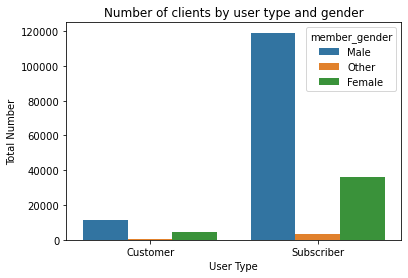

In [6]:
sb.countplot(data = fordgobike, x = 'user_type', hue = 'member_gender')
plt.xlabel('User Type')
plt.ylabel('Total Number')
plt.hue = "Member Gender"
plt.title('Number of clients by user type and gender')

<a id='visu2'></a>
## Visualization 2

The graph is showing the ride duration by gender and birth year and that's help us to suggest the best ride for client considering his age and birth year.

Text(0.5, 1.0, 'Ride duration by gender and birth year')

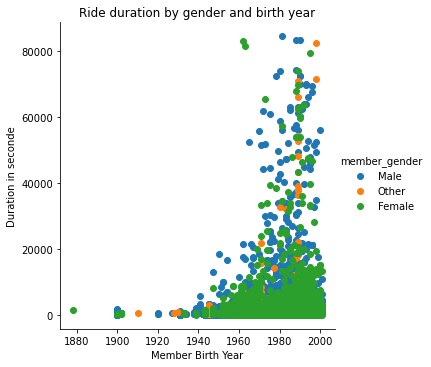

In [9]:
g = sb.FacetGrid(data = fordgobike, hue = 'member_gender',height=5)
g.map(plt.scatter, 'member_birth_year', 'duration_sec')
g.add_legend()
plt.xlabel('Member Birth Year')
plt.ylabel('Duration in seconde')
plt.title('Ride duration by gender and birth year')

<a id='visu3'></a>
## Visualization 3



The graph is showing the ride distance by gender and birth year and that's help us to suggest the best ride for client considering his age and birth year.

In [13]:
def Haversine(lat1,lon1,lat2,lon2):
    R = 6371.0088
    lat1,lon1,lat2,lon2 = map(np.radians, [lat1,lon1,lat2,lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) **2
    c = 2 * np.arctan2(a**0.5, (1-a)**0.5)
    d = R * c
    return round(d,4)
fordgobike['distance'] = Haversine(fordgobike['start_station_latitude'],fordgobike['start_station_longitude'],fordgobike['end_station_latitude'],fordgobike['end_station_longitude'])

Text(0.5, 1.0, 'Ride distance by gender and birth year')

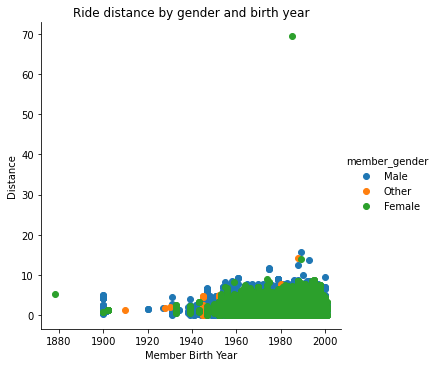

In [14]:

g = sb.FacetGrid(data = fordgobike, hue = 'member_gender',height=5)
g.map(plt.scatter, 'member_birth_year', 'distance')
g.add_legend()
plt.xlabel('Member Birth Year')
plt.ylabel('Distance')
plt.title('Ride distance by gender and birth year')